In [ ]:
#RBooth
#'AZPHX20190219DATA
# Unit 5 | Assignment - The Power of Plots: Pyber

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors as mcolors

# Read the City and Ride Data
#city_data = pd.read_csv("...Pyber HomeWork/city_data.csv")
#city_data = pd.read_csv("...Pyber HomeWork/ride_data.csv")
# Combine the data into a single dataset
#combined_rideshare_data = pd.merge(city_data, city_data, on="city")

# Display the data table for preview
#combined_rideshare_data.head()

In [5]:
# Read the City data, set index as city;
pybercity_df = pd.read_csv("/Users/rebeccajbooth/Documents/PythonStuff/city.data.csv")
print(pybercity_df.head(5))

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban


In [6]:
pybercity_df.index
## Read the ride data, set index as city:

RangeIndex(start=0, stop=120, step=1)

In [7]:
pyberrides_df = pd.read_csv("/Users/rebeccajbooth/Documents/PythonStuff/ride_data.csv")
print (pyberrides_df.head(5))

                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344


In [8]:
pyberrides_df.index

RangeIndex(start=0, stop=2375, step=1)

In [9]:
#merge outer on rides df:
pybercityrides_df = pd.merge(pyberrides_df, pybercity_df, on='city', how='left')

## Bubble Plot of Ride Sharing Data

In [10]:
#build df for city types
#urban
urban_pybercityrides = pybercityrides_df[pybercityrides_df['type'] == 'Urban'].groupby([pybercityrides_df['city']])
#suburban
suburban_pybercityrides = pybercityrides_df[pybercityrides_df['type'] == 'Suburban'].groupby([pybercityrides_df['city']])
#rural
rural_pybercityrides = pybercityrides_df[pybercityrides_df['type'] == 'Rural'].groupby([pybercityrides_df['city']])



In [11]:
#x, y, axis for each city type
xaxis_urban = urban_pybercityrides["ride_id"].count()
yaxis_urban = urban_pybercityrides["fare"].mean()
zaxis_urban = urban_pybercityrides["driver_count"].mean()

xaxis_suburban = suburban_pybercityrides["ride_id"].count()
yaxis_suburban = suburban_pybercityrides["fare"].mean()
zaxis_suburban = suburban_pybercityrides["driver_count"].mean()

xaxis_rural = rural_pybercityrides["ride_id"].count()
yaxis_rural = rural_pybercityrides["fare"].mean()
zaxis_rural = rural_pybercityrides["driver_count"].mean()

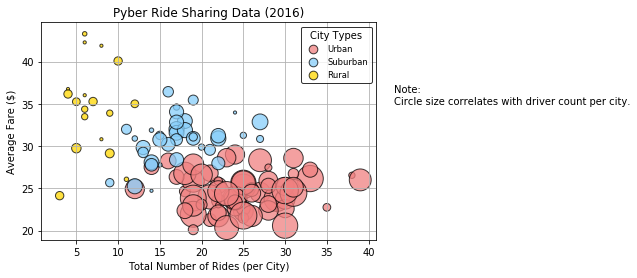

In [12]:
#create plot with o marker, custom colors for city type with black edges.
x_axis = np.arange(0, 43, 5)
#urban
plt.scatter(xaxis_urban, yaxis_urban, marker="o", label = "Urban", s=zaxis_urban * 10, color="lightcoral", edgecolor="black",alpha=0.75)
#suburban
plt.scatter(xaxis_suburban, yaxis_suburban, marker="o", label = "Suburban", s=zaxis_suburban * 10, color="lightskyblue",\
            edgecolor="black",alpha=0.75)
#rural
plt.scatter(xaxis_rural, yaxis_rural, marker="o", label = "Rural", s=zaxis_rural * 10, color="gold",\
            edgecolor="black",alpha=0.75)

#add x and y labels plus chart title
#plt.title("Pyber Ride Sharing Data (2016)")
#plt.xlabel("Total Number of Rides (per City)")
#plt.ylabel("Average Fare ($)")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")

#legend formatting
lgnd = plt.legend(frameon = True, edgecolor = 'black', title = 'City Types', fontsize = 'small')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

#add little note
plt.text(43,35, "Note:  \nCircle size correlates with driver count per city.",
    fontsize=10, fontname='Sans Serif')
#add grid
plt.grid()
# Save an image of the chart and print it to the screen
plt.savefig("/Users/rebeccajbooth/Documents/Images/PyberRideSharingBubbly.png",bbox_inches='tight',dpi=300)
plt.show()

## Total Fares by City Type

In [106]:
#Calculate Type Percents % of total fares by city type
#pie chart needed
#Variables needed:
#    urban total city and fares by city therein calc percent
print(pybercityrides_df.head(5))

                 city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban  


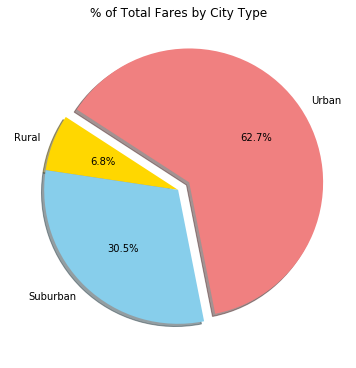

In [107]:
#for type (urban, suburban, and rural) fares/city, ]
#breakout fares data for chart
citysum = pybercityrides_df.groupby(pybercityrides_df['type']).sum()
fares = [citysum['fare']]
citysumfares =pd.DataFrame(fares)
fig = plt.gcf()
fig.set_size_inches(6,8) 
#Build Pie Chart
labels = list(citysumfares)
values = citysumfares.values.tolist()
values = values[0]
colors = ["gold", "skyblue", "lightcoral"]
explode = (0,0,0.1)
plt.axis = ("elipsis")
plt.pie(values, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=147)
plt.title("% of Total Fares by City Type")
frame = False
# Save Figure
plt.savefig("/Users/rebeccajbooth/Documents/Images/PyberFares_CityType.png",bbox_inches='tight',dpi=300)
plt.show()

In [89]:
# Show Figure
plt.show()

## Total Rides by City Type

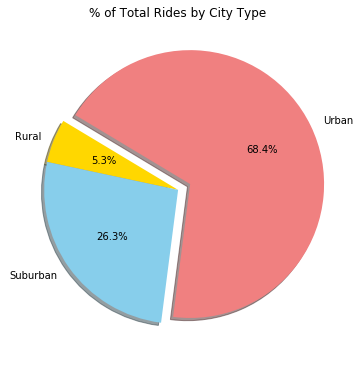

In [116]:
#for type (urban, suburban, and rural) count rides/city, 
#breakout rides data for chart
citysumrides = pybercityrides_df.groupby(['type'])
rides = citysumrides['ride_id'].count()
fig = plt.gcf()
fig.set_size_inches(6,8) 
#Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "lightcoral"]
explode = (0,0,0.1)

plt.pie(rides, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=149)
plt.title("% of Total Rides by City Type")
frame = False
# Save Figure
plt.savefig("/Users/rebeccajbooth/Documents/Images/PyberRides_citytype.png",bbox_inches='tight',dpi=300)
plt.show()

In [91]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
#total of 2973 drivers; 2405 urban, 490 suburban, and 78 rural; 80.9; 16.5 and 2.6

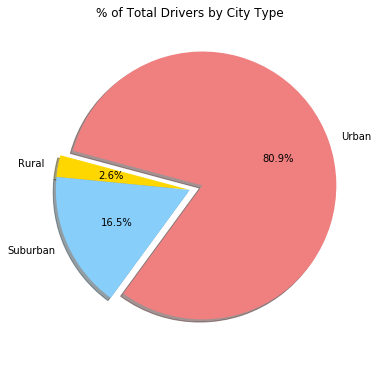

In [128]:
total_driver_df = pybercity_df.groupby(["type"]).sum()["driver_count"]
colors = ["Gold", "LightSkyBlue", "LightCoral"]
explode = (0, 0, 0.1)
fig = plt.gcf()
fig.set_size_inches(6,8) 
# Build Pie Chart
plt.pie(total_driver_df, labels=total_driver_df.index.values, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("/Users/rebeccajbooth/Documents/Images/PyberRides_citytype.png",bbox_inches='tight',dpi=300)

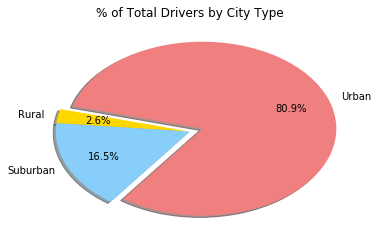

In [6]:
# Show Figure
plt.show()